# Quantum Algorithms and Simulations

**Instructor** : Hwajung Kang, Ph.D., Quantum Computational Scientist, IBM Quantum

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import *
from qiskit.visualization import plot_histogram, plot_distribution
from qiskit_aer import AerSimulator

## Quantum circuit construction

### Phase Kick-back

We showed interference pattern simulating quantum circuits using phase gate (`p`) in the first session. We can also produce same interference using quantum circuits implementing phase kick-back.

**Q. Build quantum circuits to produce interferenece implementing phase kickback with control ry gate (`cry`). Execute circuits on `Aersimulator` and plot interferene pattern.**

- [cry gate](https://qiskit.org/documentation/stubs/qiskit.circuit.library.CRYGate.html#qiskit.circuit.library.CRYGate)
- [phase gate](https://qiskit.org/documentation/stubs/qiskit.circuit.library.PhaseGate.html#phasegate)

In [2]:
backend = AerSimulator()

In [3]:
## Your code goes here
shots = 10000
angles = np.linspace(0, 8*np.pi, 200)

prob1_ry = []
qc_all = []
for ang in angles:
    qc = QuantumCircuit(2, 1)
    #qc.x(1)
    qc.h(range(2))
    qc.s(1)
    qc.cry(2*ang, 0, 1)
    qc.h(0)
    qc.measure(0, 0)
    qc_all.append(qc)

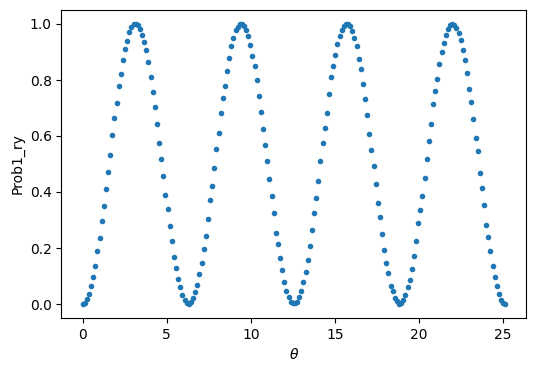

In [4]:
qc_all_trans = transpile(qc_all, backend)
counts_all = backend.run(qc_all_trans, shots=shots).result().get_counts()

for counts in counts_all:
    if '1' in counts:
        prob1_ry.append(counts['1']/shots) 
    else:
        prob1_ry.append(1 - counts['0']/shots)
        
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(angles, prob1_ry, '.')
ax.set_xlabel('$\\theta$')
ax.set_ylabel('Prob1_ry');

### Bernstein-Vazirani 
- Qubit ordering

**Q. Construct a quantum circuit implementing Bernstein-Vazirani algorithm to find the secret bit string $a = 1101$ of the function,
$f:\{0, 1\}^n \rightarrow \{0, 1\}$ and
$f(x) = x\cdot a~(mod2)$.  Simulate the circuit using `Aersimulator`.**

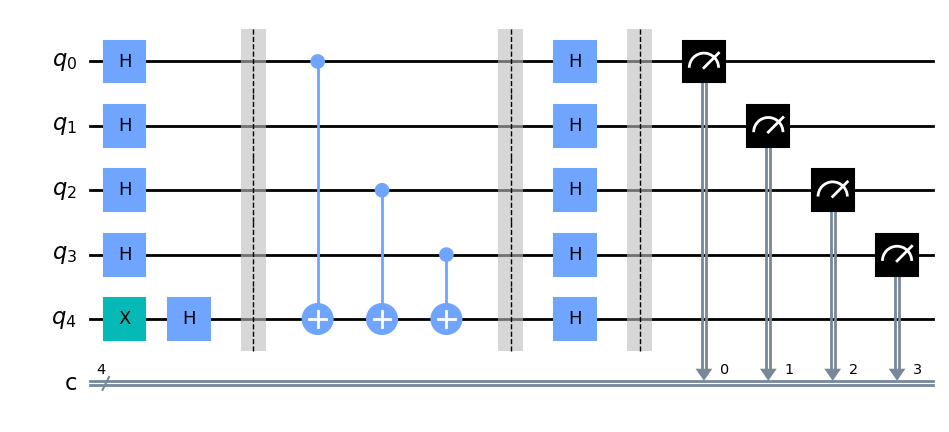

In [5]:
a = '1101'
nq = len(a)+1

bv = QuantumCircuit(nq, nq-1)
bv.x(nq-1)
bv.h(range(nq))
bv.barrier()
bv.cx([0, 2, 3], nq-1)
bv.barrier()
bv.h(range(nq))
bv.barrier()
bv.measure(range(nq-1), range(nq-1))

bv.draw('mpl')

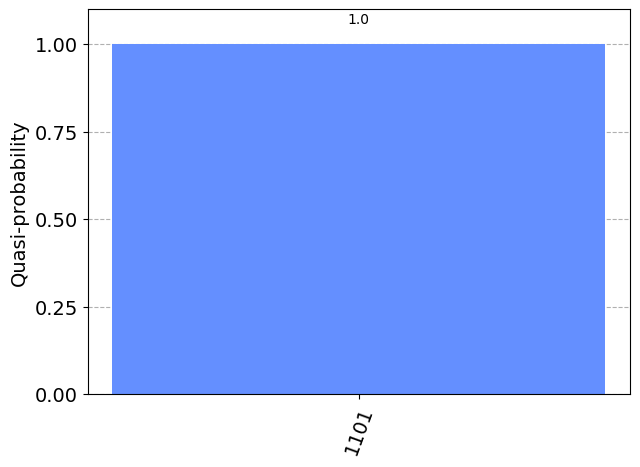

In [6]:
counts_bv = backend.run(bv).result().get_counts()
plot_distribution(counts_bv)

### Grover algorithm

- Combine multiple quantum circuits

**Q. Consruct  and simulate a quantum circuit implementing grover algorithm when the oracle has two solutions '000' and '111'.**

- [combining circuits](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.compose.html)

- [composite gates](https://qiskit.org/documentation/tutorials/circuits_advanced/01_advanced_circuits.html)

In [7]:
nq, M = 3, 2

theta = 2 * np.arcsin(np.sqrt(M/2**nq))
num_iter = np.arccos(np.sqrt(M/2**nq))/theta
print(num_iter)

1.0


In [8]:
num_iter = np.floor(np.pi*np.sqrt(2**nq/M)/4)
num_iter

1.0

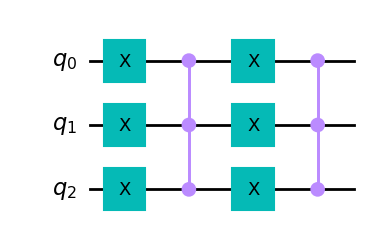

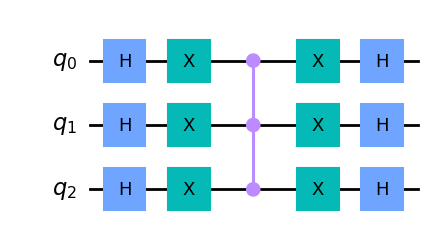

In [9]:
## your code goes here

solution = ['000', '111']
oracle = QuantumCircuit(3, name='oracle')
oracle.x(range(3))
oracle.ccz(0, 1, 2)
oracle.x(range(3))
oracle.ccz(0, 1, 2)
display(oracle.draw('mpl'))

amp = QuantumCircuit(3, name='Ampl')
amp.h(range(3))
amp.x(range(3))
amp.ccz(0, 1, 2)
amp.x(range(3))
amp.h(range(3))
display(amp.draw('mpl'))

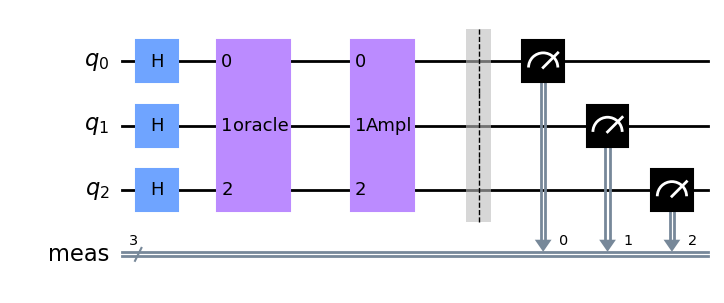

In [10]:
# grover = QuantumCircuit(3)
# grover.h(range(3))
# grover.compose(oracle, inplace=True)
# grover.compose(amp, inplace=True)
# grover.measure_all()
# grover.draw('mpl')

grover = QuantumCircuit(3)
grover.h(range(3))
grover.append(oracle, range(3))
grover.append(amp, range(3))
grover.measure_all()
grover.draw('mpl')

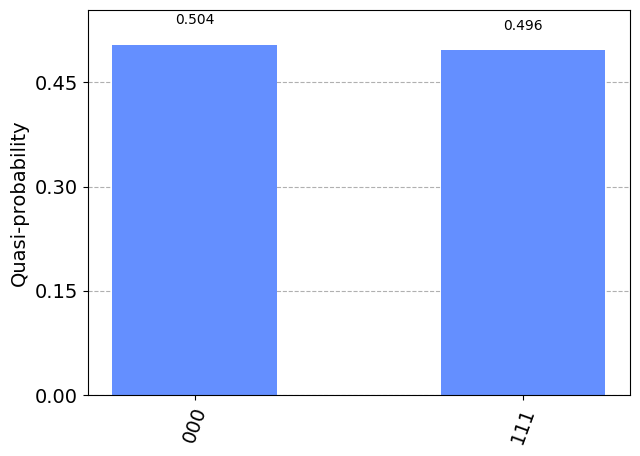

In [11]:
grover_trans = transpile(grover, backend)
counts_grover = backend.run(grover_trans).result().get_counts()
plot_distribution(counts_grover)

### Quantum Phase Estimation (QPE)

**Q. Build and simulate a QPE circuit to find an eigenvalue of $U$ that is not one varying the number of counting qubits from one to three where** 

\begin{equation}
U = 
\begin{pmatrix}
1 & 0 \\
0 & e^{i\frac{\pi}{4}}\\
\end{pmatrix}.
\end{equation}

**Plot and compare the results.**  

- [Qiskit circuit library](https://qiskit.org/documentation/apidoc/circuit_library.html)
- [QFT](https://qiskit.org/documentation/stubs/qiskit.circuit.library.QFT.html#qiskit.circuit.library.QFT)

In [12]:
from qiskit.circuit.library import QFT

In [13]:
## your code goes here

def QPE_T(t):

    n = 1

    qc = QuantumCircuit(t+n, t)
    qc.h(range(t))
    qc.x(-1)
    for kk in range(t):
        qc.cp(np.pi/4*(2**kk), kk, -1)
    qc.append(QFT(t).inverse(), range(t))

    qc.measure(range(t), range(t))

    return qc

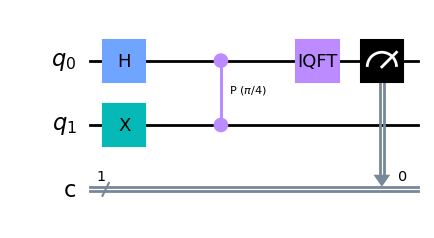

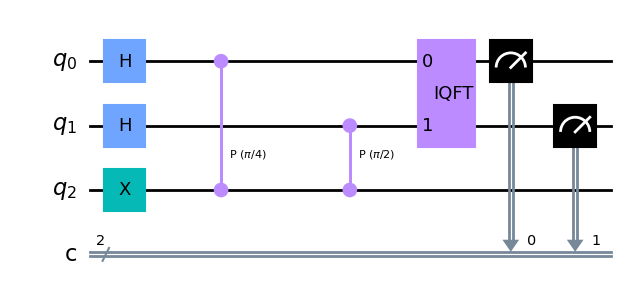

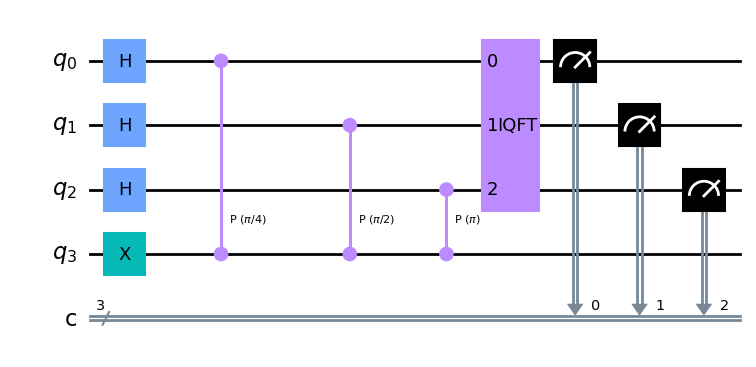

In [14]:
qc_all = QPE_T(1), QPE_T(2), QPE_T(3)

for qc in qc_all:
    display(qc.draw('mpl'))

In [15]:
qc_all_trans = []

for qc in qc_all:
    qc_all_trans.append(transpile(qc, backend))

counts_all = backend.run(qc_all_trans, shots=10000).result().get_counts()

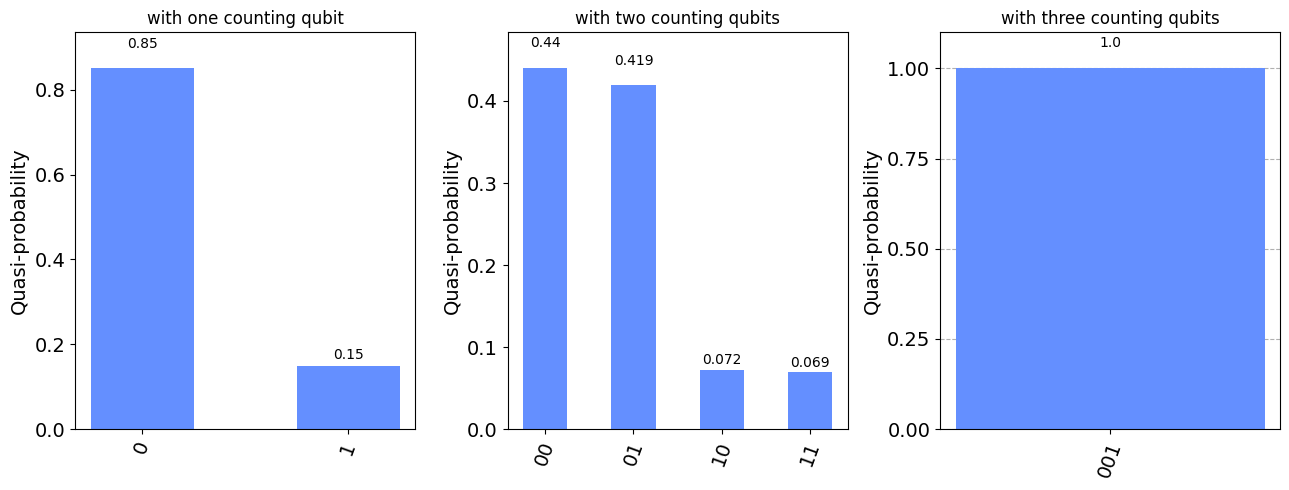

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(13, 5))

plot_distribution(counts_all[0], ax=ax[0])
plot_distribution(counts_all[1], ax=ax[1])
plot_distribution(counts_all[2], ax=ax[2])

ax[0].set_title('with one counting qubit')
ax[1].set_title('with two counting qubits')
ax[2].set_title('with three counting qubits')

fig.tight_layout()

### Statevector simulation

Returns a final quantum statevector.

In [21]:
from qiskit.quantum_info import Statevector

[quantum_info module](https://qiskit.org/documentation/apidoc/quantum_info.html#module-qiskit.quantum_info)

#### Exact Distribution - GHZ state

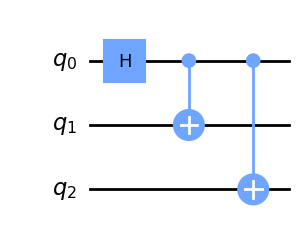

In [22]:
ghz = QuantumCircuit(3)
ghz.h(0)
ghz.cx(0, [1, 2])
ghz.draw('mpl')

In [23]:
st_ghz = Statevector(ghz)
print(st_ghz)
prob_ghz = st_ghz.probabilities_dict()
prob_ghz

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.70710678+0.j],
            dims=(2, 2, 2))


{'000': 0.4999999999999999, '111': 0.4999999999999999}

#### Quantum state preparation

In [24]:
from qiskit.quantum_info import random_unitary
import numpy.linalg as la

In [25]:
n_st = 2
Urand_new = random_unitary(2**n_st)
vals_new, vecs_new = la.eig(Urand_new)
val_new, st_new = vals_new[1], vecs_new[:, 1]

In [26]:
qc_st_new = QuantumCircuit(n_st)
qc_st_new.initialize(st_new, range(n_st))

st_new_gen = Statevector(qc_st_new)

print('state: {}'.format(st_new))
print('state generated: {}'.format(st_new_gen.data))

state: [ 0.18550213+0.39803419j -0.5770497 -0.06794089j  0.68177432+0.j
  0.01057167-0.06802525j]
state generated: [ 0.18550213+0.39803419j -0.5770497 -0.06794089j  0.68177432+0.j
  0.01057167-0.06802525j]


In [27]:
print(la.norm(st_new.data - st_new_gen.data)) 

0.0


#### Track quantum states - Grover

Intermediate state - check Oracle

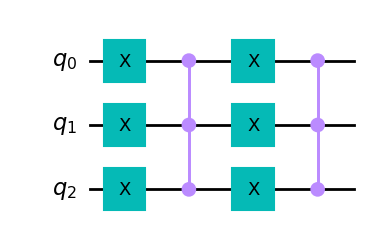

In [28]:
oracle.draw('mpl')

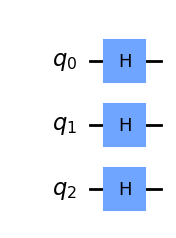

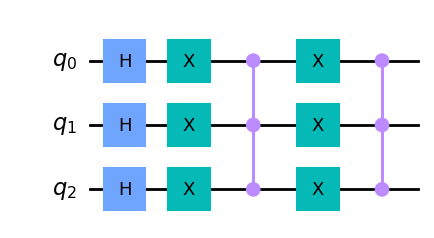

In [29]:
qc_inp = QuantumCircuit(3) 
qc_inp.h(range(3))
display(qc_inp.draw('mpl'))

Oout = qc_inp.compose(oracle)
display(Oout.draw('mpl'))

In [30]:
st_Oout = Statevector(Oout)
st_Oout

Statevector([-0.35355339+0.j,  0.35355339+0.j,  0.35355339+0.j,
              0.35355339+0.j,  0.35355339+0.j,  0.35355339+0.j,
              0.35355339+0.j, -0.35355339+0.j],
            dims=(2, 2, 2))


Final state 

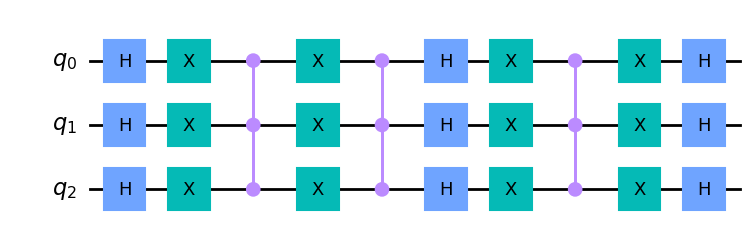

In [31]:
grover = Oout.compose(amp)
grover.draw('mpl')

In [32]:
grover_st = Statevector(grover)
np.round(grover_st, 3)

array([-0.707+0.j, -0.   +0.j,  0.   +0.j, -0.   +0.j, -0.   +0.j,
        0.   +0.j, -0.   +0.j, -0.707+0.j])

In [33]:
prob_grover = grover_st.probabilities_dict()
prob_grover

{'000': 0.4999999999999993,
 '001': 3.1697683532918522e-68,
 '010': 3.9621727475551315e-35,
 '011': 1.814210694026673e-34,
 '100': 1.814210694026673e-34,
 '101': 3.9621727475551315e-35,
 '110': 3.1697683532918522e-68,
 '111': 0.4999999999999993}

In [34]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright